In [23]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


width=627, height=335, depth=3
Our first pixels in BGR:  [26 25 33]
R=42, G=56, B=44


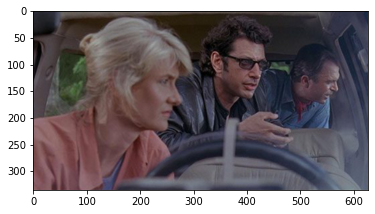

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(h, w, d) = image.shape

print("width={}, height={}, depth={}".format(w, h, d))
print("Our first pixels in BGR: ", image[0][0])
(B, G, R) = image[100, 50]

print("R={}, G={}, B={}".format(R, G, B))

plt.imshow(image)
plt.show()



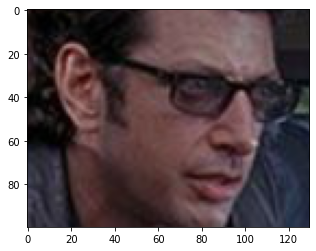

In [ ]:
# number of rows (height), number of columns(weight)
roi = image[60: 160, 320:450]
plt.imshow(roi)
plt.show()

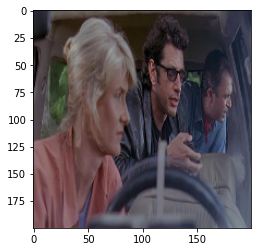

In [ ]:
resized = cv2.resize(image, (200,200))
plt.imshow(resized)
plt.show()

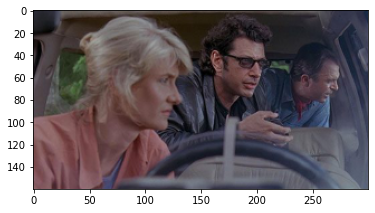

In [ ]:
r = 300 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
plt.imshow(resized)
plt.show()

In [ ]:
r

0.4784688995215311

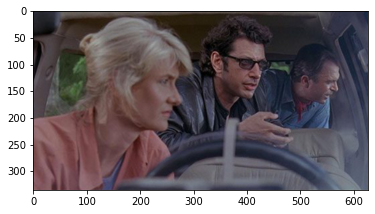

In [ ]:
plt.imshow(image)
plt.show()

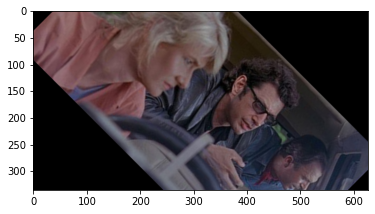

array([[   0.70710678,   -0.70710678,  209.76240995],
       [   0.70710678,    0.70710678, -172.41125497]])

In [ ]:
# to perform integer math (no floating point values)
center = (w // 2, h // 2)
# -45 means, rotate 45 degrees clockwise
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
plt.imshow(rotated)
plt.show()

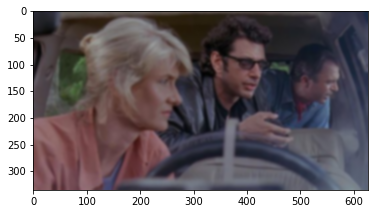

In [ ]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
plt.imshow(blurred)
plt.show()
# we perform a Gaussian Blur with an 11 x 11 kernel

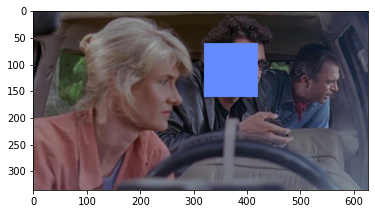

In [ ]:
output = image.copy()
# a negative value will make a solid rectangle -> thickness
cv2.rectangle(output, (320, 60), (420, 160), (100, 140, 255), 7)
plt.imshow(output)
plt.show()

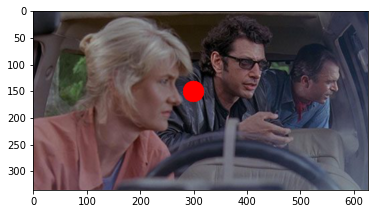

In [ ]:
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
plt.imshow(output)
plt.show()


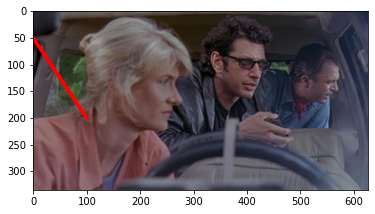

In [ ]:
output = image.copy()
cv2.line(output, (0, 50), (100,200), (255, 0, 0), 6)
plt.imshow(output)
plt.show()

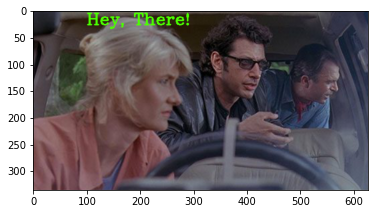

In [11]:
output = image.copy()
cv2.putText(output, "Hey, There!", (100, 25),
            cv2.FONT_HERSHEY_COMPLEX, 1, (75, 255, 0), 2)

plt.imshow(output)
plt.show()



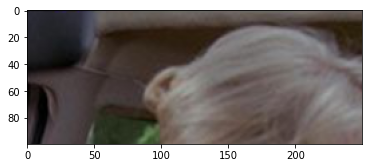

In [15]:
a = image[0:100, 0:250]
plt.imshow(a)
plt.show()

In [16]:
##Counting Objects

In [18]:
!pip install argparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [11]:
!python main.py --image "/content/tetris_blocks.png" # -_-

<Figure size 640x480 with 1 Axes>


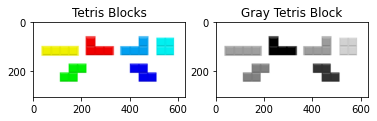

In [12]:
%run main.py --image "/content/tetris_blocks.png"

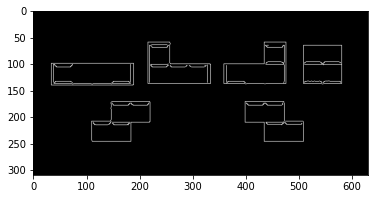

In [19]:
image_path = "/content/tetris_blocks.png"
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray_image, 30, 150)

plt.imshow(edges, cmap='gray')
plt.show()

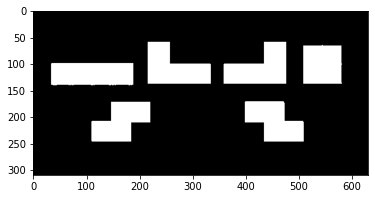

In [22]:
thresh = cv2.threshold(gray_image, 225, 255, 
                       cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')
plt.show()

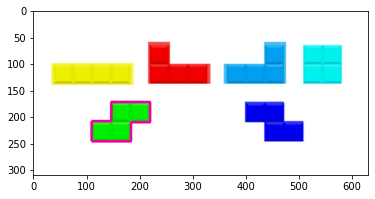

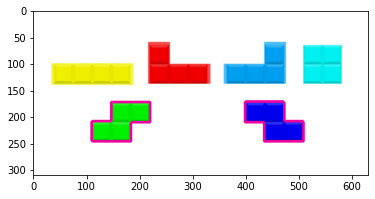

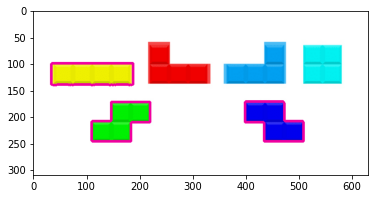

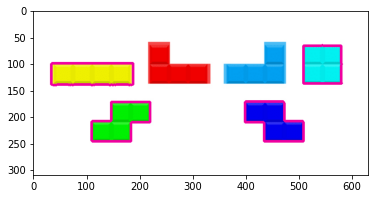

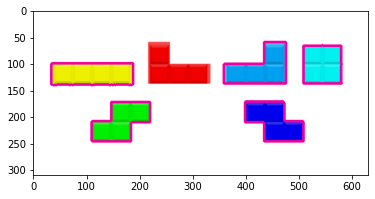

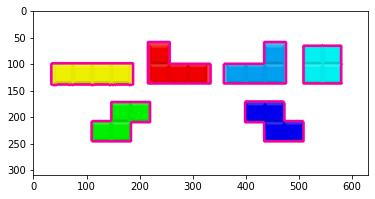

In [26]:
import imutils
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output= image.copy()

for c in cnts:
  cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
  plt.imshow(output)
  plt.show()

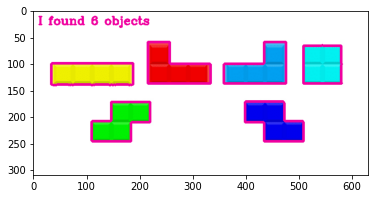

In [27]:
text = "I found {} objects".format(len(cnts))
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_COMPLEX, 0.7,
            (240, 0, 159), 2)
plt.imshow(output)
plt.show()

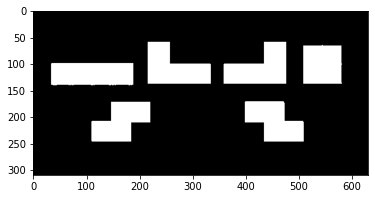

In [30]:
plt.imshow(thresh, cmap='gray')
plt.show()

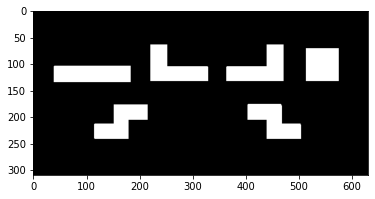

In [32]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
plt.imshow(mask, cmap='gray')
plt.show()

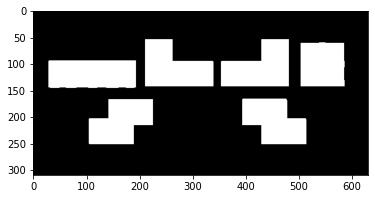

In [35]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
plt.imshow(mask, cmap='gray')
plt.show()

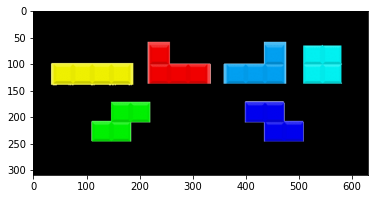

In [37]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output-)
plt.show()